In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from lifelines import KaplanMeierFitter, NelsonAalenFitter

url = 'https://raw.githubusercontent.com/flemm0/cancer_dataset_analysis/main/cancer-datasets_filtered_pancan_clinical.csv?token=GHSAT0AAAAAABQTFKFTJAZ3GU4UL2AE6QZWYQFU6RQ'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,11,20,22,44,48,53,54,77,81,84,85,87,89,90,91,92,93,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,137,138,139,140,141,142,143,144,145,146,148,150,151,153,155,156,157,158,159,162,164,166,167,168,169,170,171,176,177,178,181,182,184,188,189,191,193,194,195,196,197,198,199,200,201,202,203,204,205,207,211,212,214,215,216,217,218,220,221,222,224,225,226,227,228,229,230,231,232,233,234,236,237,238,239,241,242,250,251,252,253,254,255,256,258,259,260,261,262,263,264,265,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,310,311,314,315,316,317,318,319,320,321,322,323,324,325,327,328,333,334,335,336,339,341,342,343,344,345,346,347,350,351,352,353,354,355,358,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,376,377,378,379,381,382,383,384,38

In [ ]:
df

,bcr_patient_uuid,bcr_patient_barcode,acronym,gender,vital_status,days_to_birth,days_to_death,days_to_last_followup,days_to_initial_pathologic_diagnosis,age_at_initial_pathologic_diagnosis,...,total_bilirubin_upper_limit,platelet_result_count,fibrosis_ishak_score,fetoprotein_outcome_value,fetoprotein_outcome_upper_limit,fetoprotein_outcome_lower_limit,inter_norm_ratio_lower_limit,family_cancer_type_txt,bilirubin_upper_limit,days_to_last_known_alive
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,TCGA-IQ-A6SG,HNSC,FEMALE,Alive,-22529.0,[Not Applicable],579.0,0.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,TCGA-IQ-A6SH,HNSC,MALE,Alive,-20109.0,[Not Applicable],471.0,0.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,TCGA-XP-A8T7,ESCA,FEMALE,Alive,-23375.0,[Not Applicable],1254.0,0.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,TCGA-XP-A8T6,ESCA,MALE,Dead,-19886.0,763.0,NaN,0.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9fa752b7-9873-4bad-9eba-8cc113705fed,TCGA-CD-5804,STAD,MALE,Alive,-32872.0,[Not Applicable],368.0,0.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10756,a0700d6d-df7b-4327-8738-97b8ad08fd4c,TCGA-06-0240,GBM,MALE,Dead,-20937.0,621,NaN,0.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10757,7529980c-839d-4887-b5d7-09a3e7159427,TCGA-06-0142,GBM,MALE,Dead,-29642.0,67,NaN,0.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10758,f2cef0e2-fece-4499-9f99-c5719aff8b5a,TCGA-06-0150,GBM,MALE,Dead,-16442.0,592,NaN,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10759,2cb9975f-2d1e-4c74-867f-8b151c22b246,TCGA-06-0119,GBM,FEMALE,Dead,-29606.0,82.0,NaN,0.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#1 How many columns are in this dataset?

In [ ]:
print('Number of columns:', len(df.columns))

Number of columns: 746


#2 Breakdown columns by datatypes and counts

In [ ]:
df.dtypes.value_counts()

object     500
float64    246
dtype: int64

In [ ]:
#df.info(verbose=True)

#3 Breakdown counts by gender, race, and ethnicity

In [ ]:
ls = ['gender', 'race', 'ethnicity']

for col in ls:
    print(df[col].value_counts(), '\n')

FEMALE    5623
MALE      5138
Name: gender, dtype: int64 

WHITE                                        7862
BLACK OR AFRICAN AMERICAN                     902
ASIAN                                         670
[Not Evaluated]                               153
[Unknown]                                     131
AMERICAN INDIAN OR ALASKA NATIVE               27
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      13
Name: race, dtype: int64 

NOT HISPANIC OR LATINO    7850
[Not Evaluated]            573
HISPANIC OR LATINO         366
[Unknown]                  186
Name: ethnicity, dtype: int64 



#4 Provide a report of missingness across all columns

In [ ]:
df.isna().sum()

bcr_patient_uuid                       0
bcr_patient_barcode                    0
acronym                                0
gender                                 0
vital_status                           4
                                   ...  
fetoprotein_outcome_lower_limit    10736
inter_norm_ratio_lower_limit       10734
family_cancer_type_txt             10740
bilirubin_upper_limit              10729
days_to_last_known_alive           10750
Length: 746, dtype: int64

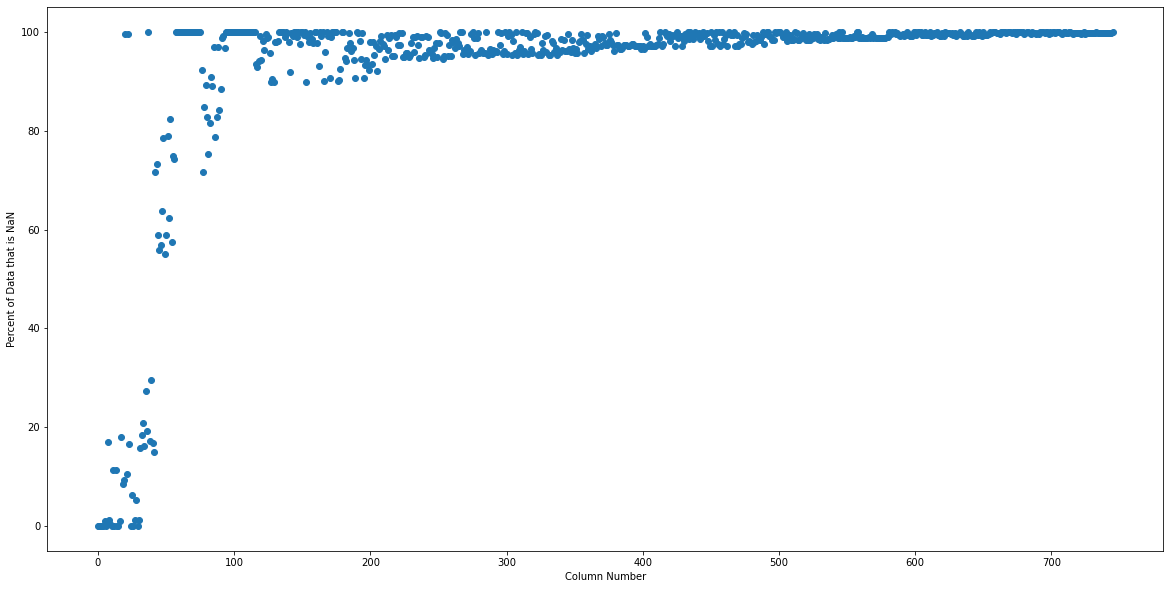

In [ ]:
# (#4 continued)

#Generate a scatterplot showing what percent of each column is NaN 

values_list = []
cols_list = []
for idx, col in enumerate(df.columns):
    percent_missing = df[col].isna().sum()/len(df)*100
    cols_list.append(idx)
    values_list.append(percent_missing)

    
plt.figure(figsize=(20,10))
plt.scatter(cols_list, values_list)
plt.ylabel('Percent of Data that is NaN')
plt.xlabel('Column Number')

plt.show() #appears the the later columns in the dataset are missing more values

#5 What's the average age of a patient in this dataset?

In [ ]:
#df.isna().sum().head(n=50)
#df.days_to_initial_pathologic_diagnosis.value_counts() #reutrns all 0's
#df.days_to_last_followup.value_counts() #1839 missing values


In [ ]:
#First method of determining age is to convert 'days_to_birth' into years by dividing by 365
#This method does not account for leap years (relatively negligible) and reports the age of patients on the day their data is recorded in \
#the 'days_to_birth' column. 
#It does not assume any correlations between the day that 'days_to_birth' was recorded and any other column in the dataset.


age = df['days_to_birth'].apply(lambda x: -x / 365) 
age.describe()

count    10644.000000
mean        59.649223
std         14.381444
min         10.909589
25%         50.793151
50%         60.898630
75%         70.137671
max         90.186301
Name: days_to_birth, dtype: float64

In [ ]:
# (#5 continued)
#Second method of finding age:
#The assumption I made in this method is that the 'form_completion_date' is the date that the data are recorded for each patient \
#and is the same day that 'days_to_birth' was recorded.
#Essentially, I assumed that on the day that the form was completed, each patient was 'days_to_birth' days old.

#I also noticed that some of the days on the form completion date were '00', so I changed them to '15', the middle of the month
#I got the year in which each patient completed the form, subtracted the year of initial diagnosis and added this value to age \
#of each patient when they were initially diagnosed.
#This method returns the age of each patient at the time the form was completed.


df2 = df.loc[:,['days_to_birth',
                 'form_completion_date',
                 'age_at_initial_pathologic_diagnosis', 
                 'year_of_initial_pathologic_diagnosis']]

df2['form_completion_date'] = df2['form_completion_date'].str.replace('-00', '-15', regex=True)

df2['form_completion_date'] = pd.to_datetime(df2['form_completion_date'])

df2['current_year'] = df2['form_completion_date'].apply(lambda x: x.year)
df2['age'] = df2['age_at_initial_pathologic_diagnosis'] + (df2['current_year'] -
                                                                  df2['year_of_initial_pathologic_diagnosis'])

df2['age'].describe()

count    10473.000000
mean        62.885706
std         14.703175
min         16.000000
25%         54.000000
50%         64.000000
75%         73.000000
max        108.000000
Name: age, dtype: float64

#6 Provide a breakdown of the patients' birth year

<AxesSubplot:>

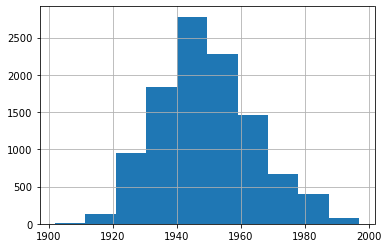

In [ ]:
#My initial approach to this question was to subtract 'days_to_birth' column from the day that the form was completed:
#Similar to my second method to approaching question 5, I assumed that the days_to_birth was recorded on the day \
#that the form was completed.
#I also noticed that there are dates on the 'form_completion_date' column that only contain a month and year, so \
#to account for this, I set the day to the middle of the month, on the 15th.
#My code for this is commented out below:

"""
df2 = df.loc[:, ['days_to_birth','form_completion_date']]
#df2.head(n=30)

df2['form_completion_date'] = df2['form_completion_date'].str.replace('-00', '-15', regex=True)

df2['form_completion_date'] = pd.to_datetime(df2['form_completion_date'])
df2['bday']  = df2['form_completion_date'] +  pd.to_timedelta(df2['days_to_birth'], unit='d')
df2.bday.hist()
"""

#I then realized that both the year and age at which each patient was initially diagnosed was recorded, making finding the birth year much simpler
#Subtract age at initial diagnosis from year of initial diagnosis
#A limitation to this method, however, is that it doesn't account for whether a patient has had their birthday 
#at the time when age at initial diagnosis was recorded

(df['year_of_initial_pathologic_diagnosis'] - df['age_at_initial_pathologic_diagnosis']).hist()

#7 Provide a list of the top 20 sorted values of the ECOG column

In [ ]:
#Since there are only 6 possible values for one's ECOG Performance Status (0-5), I cross-referenced the values in this column with Karnofsky \
#performance status, a similarly used method for assessing the functional status of a patient.

#Below I provide the top 20 most common values for patients' ECOG values based on their assessed ECOG and Karnofsky statuses.
#I also disregarded values 'Not Evaluated' and 'Uknown'.

df3 = df[['eastern_cancer_oncology_group', 'karnofsky_performance_score']]
df4 = df3.replace(to_replace=['[Not Evaluated]', '[Unknown]'], value = np.nan)
df4.groupby(['eastern_cancer_oncology_group', 'karnofsky_performance_score'], dropna=True).size().sort_values(ascending=False).head(n=20)

eastern_cancer_oncology_group  karnofsky_performance_score
0                              100                            150
1                              90                             133
                               80                             101
0                              90                              50
2                              80                              21
                               60                              17
1                              70                               9
2                              70                               9
3                              40                               6
1                              0                                3
2                              90                               3
                               50                               3
3                              70                               2
4                              50                               2
1                

#8 Identify Metastatic Cancer patients and group them by ICD codes

<AxesSubplot:>

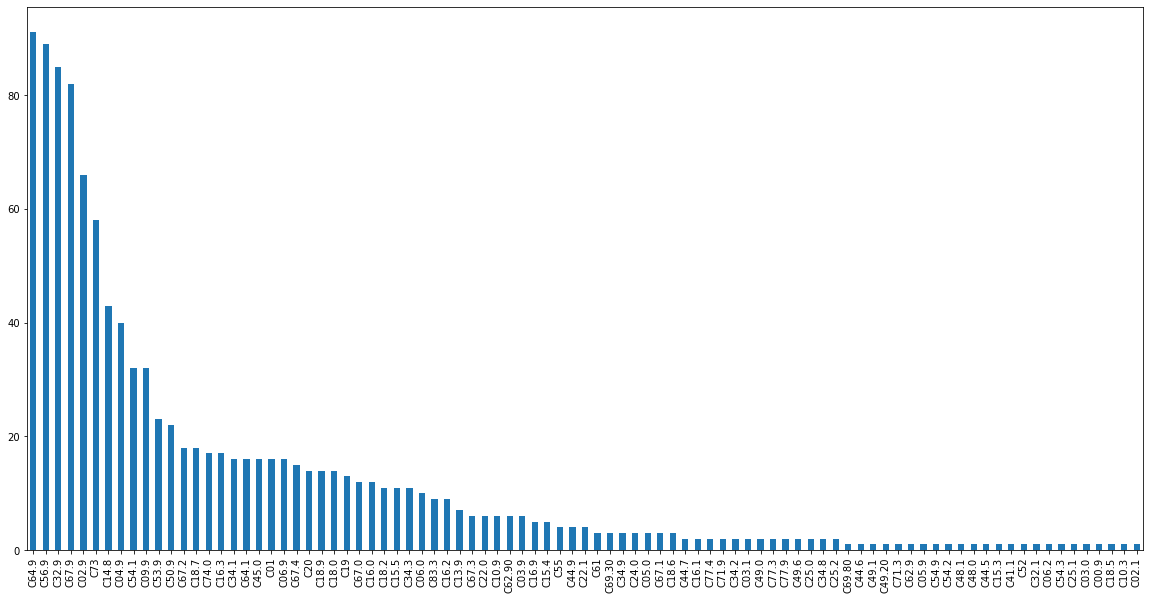

In [ ]:
#Select columns of interest and use str.contains() to identify Stage 4 or M1 values

icd_df = df[df['pathologic_M'].str.contains('M1') | 
            df['clinical_M'].str.contains('M1') | 
            df['pathologic_stage'].str.contains('Stage IV') | 
            df['clinical_stage'].str.contains('Stage IV')]['icd_10']

icd_df.value_counts().plot(kind='bar', figsize=(20, 10))

#9 Provide a survival analysis of all Breast Cancer patients

In [ ]:
""" 
https://www.icd10data.com/ICD10CM/Codes/C00-D49/C50-C50/C50-  - According to this source, ICD-10 code for breast cancer 
patients contain "C50.xxx", where the "50" before the decimal indicates breast cancer, and digits following indicate a 
more specific location. I will be using all patients with icd-10 codes that match "C50." for the survival analysis. 




I chose to use 'days_to_death' column to represent the time of survival because:
I noticed that the days_to_birth column were negative values, leading me to suspect that the negative values represented \
days AFTER birth.
Since the days_to_death column values are positive integers, these values must represent days from a certain \
significant point in time for each patient (I assume start of treatment) leading up to death. 
"""

#Create df of only breast cancer patients

df_bc = df[df['icd_10'].str.contains('C50.', na=False)].loc[:, ['days_to_death','vital_status']]


In [ ]:
#df_bc.days_to_death.value_counts() #returns 938 'Not Applicable', which corresponds to the 938 'Alive' vital_status patients

#Relabel vital_status column and perform censoring

df_bc.loc[(df.vital_status == 'Alive'),'vital_status'] = 0
df_bc.loc[(df.vital_status == 'Dead'), 'vital_status'] = 1


# pd.isnull(df_bc).value_counts() #found one NaN where [Not Applicable] should be, replace it with NaN
df_bc = df_bc.fillna('[Not Applicable]')


# df_bc = df_bc.astype(str).replace('[Not Applicable]', np.nan) 
# dc_bc['days_to_death'].max() 
#With the above code, I found the max survival of a patient that passed away to be 991 days, so I set survival time \
#of the patients that have not experienced the event of interest to 991 for the purposes of converting the time column \
#to type float.

df_bc['days_to_death'] = df_bc['days_to_death'].replace(to_replace='[Not Applicable]', value = 991)
df_bc['days_to_death']  = df_bc.days_to_death.astype(float)

df_bc['vital_status'].value_counts()

0    938
1    151
Name: vital_status, dtype: int64

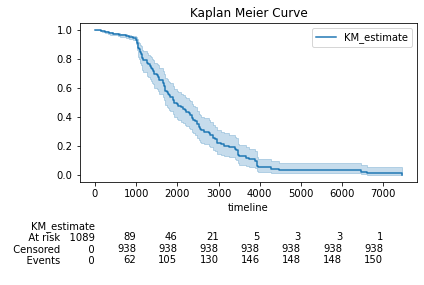

In [ ]:
kmf = KaplanMeierFitter()

T = df_bc['days_to_death']
E = df_bc['vital_status']

kmf.fit(T, event_observed=E)

kmf.plot_survival_function(at_risk_counts=True)

plt.title('Kaplan Meier Curve')
plt.ylabel('Probability of a patient surviving')
plt.show()


Further Exploration of Data

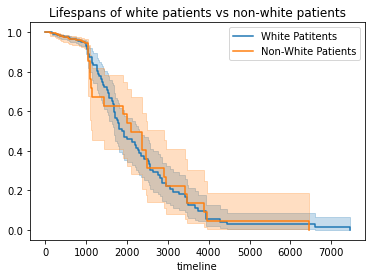

In [ ]:
#Below I wanted to analyze the differing survival functions for white and non-white breast cancer patients  

df_bc2 = df[df['icd_10'].str.contains('C50.', na=False)].loc[:, ['days_to_death','vital_status', 'race']]

ax = plt.subplot(111)

white = (df_bc2['race'] == 'WHITE')

kmf.fit(T[white], event_observed=E[white], label="White Patitents")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~white], event_observed=E[~white], label="Non-White Patients")
kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of white patients vs non-white patients"); #not many events observed for non-white breast cancer patients \
#resulting in large drops in function and large confidence interval range 

          NA_estimate
timeline             
0.0          0.000000
116.0        0.000918
158.0        0.001837
160.0        0.002757
172.0        0.003678


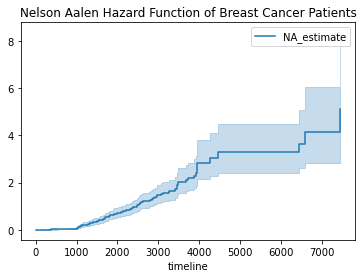

In [ ]:
#Below I wanted to play around with the Nelson Aalen estimator for visualizing hazard rate function

naf = NelsonAalenFitter()

naf.fit(T, event_observed=E)

print(naf.cumulative_hazard_.head())
naf.plot_cumulative_hazard()

plt.title('Nelson Aalen Hazard Function of Breast Cancer Patients')
plt.show()


With a little more information on when this data was recorded (specifically meanings of days_to_birth and days_to_death columns), it would be possible to increase the accuracy of the reports of the patients' age and subsequently, the accuracy of the survival analyses.
It would also be very interesting to explore covariates and how different models affect relationship between the survival time of individuals and predictor variables.